In [2]:
from SliceNet import SliceNet
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
net = SliceNet(classification=True)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0420 17:57:00.601013 140063657535232 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0420 17:57:01.930090 140063657535232 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0420 17:57:03.049249 140063657535232 deprecation.py:506] From /home/bmmidei/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
dataPath = Path('/home/bmmidei/SliceCast/data/train/hdf5_noIntro')
files = [str(x) for x in dataPath.glob('**/*') if x.suffix=='.hdf5']

val_prop = 0.2
mask = random.sample(range(0,len(files)), math.floor(val_prop*len(files)))

# randomly assign some files to validation and the rest to train
train_files = [x for (i,x) in enumerate(files) if i not in mask]
val_files = [x for (i,x) in enumerate(files) if i in mask]

In [ ]:
history, pkscores = net.train(train_files=train_files,
                        val_files=val_files,
                        batch_size=8, 
                        epochs=20,
                        steps_per_epoch=1000,
                        maxlen=None,
                        save=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoderIn (InputLayer)       (None, None)              0         
_________________________________________________________________
encoderOut (Lambda)          (None, None, 512)         0         
_________________________________________________________________
lstm_1 (Bidirectional)       (None, None, 512)         1574912   
_________________________________________________________________
lstm_2 (Bidirectional)       (None, None, 512)         1574912   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 256)         131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 256)         0         
__________

W0420 17:57:36.901239 140063657535232 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/20
1000/1000 [==============================] - 1952s 2s/step - loss: 0.6928 - categorical_accuracy: 0.8980 - val_loss: 0.7431 - val_categorical_accuracy: 0.8723
PK Score for epoch 1 is 0.6801
Epoch 2/20
1000/1000 [==============================] - 1752s 2s/step - loss: 0.6546 - categorical_accuracy: 0.9093 - val_loss: 0.7134 - val_categorical_accuracy: 0.9111
PK Score for epoch 2 is 0.6471
Epoch 3/20
1000/1000 [==============================] - 2008s 2s/step - loss: 0.6415 - categorical_accuracy: 0.9168 - val_loss: 0.7147 - val_categorical_accuracy: 0.9185
PK Score for epoch 3 is 0.6418
Epoch 4/20
1000/1000 [==============================] - 1821s 2s/step - loss: 0.6381 - categorical_accuracy: 0.9205 - val_loss: 0.7683 - val_categorical_accuracy: 0.9134
PK Score for epoch 4 is 0.6334
Epoch 5/20
1000/1000 [==============================] - 1896s 2s/step - loss: 0.6148 - categorical_accuracy: 0.9255 - val_loss: 0.7357 - val_categorical_accuracy: 0.9111
PK Score for epoch 5 is 0.

In [8]:
print(type(history))
a = history[1]
print(a.on_train_end())
print(dir(a))

<class 'tuple'>
[0.5607312117190467, 0.8404294897394937, 0.8676206896158059]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'k', 'model', 'num_samples', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_train_begin', 'on_train_end', 'params', 'pk', 'set_model', 'set_params', 'test_file']


# Visualizing Results

## Loss and Accuracy during training

In [5]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

1.13.1
importing hub


NameError: name 'history' is not defined

## Sample predictions on unseen wiki articles

In [39]:
test_file = val_files[1]
weights_path = '/home/bmmidei/SliceCast/models/weights_epoch008.h5'

preds, labels = net.predict(test_file=test_file,
                    num_samples=4,
                    weights_path=weights_path)

Starting Testing
Loaded weights from disk


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7ff65c128a58>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


In [46]:
np.set_printoptions(suppress=True)
print(preds.shape)
print(labels.shape)


#preds_mod[:,:,1] = np.add(preds_mod[:,:,1], -0.7)
p = np.argmax(preds, axis=2)
l = np.argmax(labels, axis=2)

idx = 1
listview = np.concatenate([preds, np.expand_dims(l, -1)], axis=2)
print(listview[idx])


(4, 62, 3)
(4, 62, 3)
(4, 62)
(4, 62)
[[0.         1.         0.         1.        ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.10549998 0.89449602 0.00000392 0.        ]
 [0.40249452 0.59746313 0.0000424  0.        ]
 [0.00000776 0.99999225 0.         0.        ]
 [0.99999726 0.0000027  0.         0.        ]
 [0.96999109 0.03000896 0.         0.        ]
 [0.99980158 0.00019848 0.         0.        ]
 [0.76041466 0.23958451 0.00000079 0.        ]
 [0.41718554 0.58278072 0.00003367 0.        ]
 [0.9999963  0.00000368 0.         0.        ]
 [0.99999905 0.00000101 0.         0.        ]
 [0.14681743 0.85317922 0.00000339 0.        ]
 [0.00363322 0.99636674 0.         0.        ]
 [0.26228467 0.7377128  0.00000254 0.        ]
 [0.99999952 0.00000042 0.         0.        ]
 [0.54945505 0.45049039 0.00005462 0.        ]
 [0.99996555 0.0000344

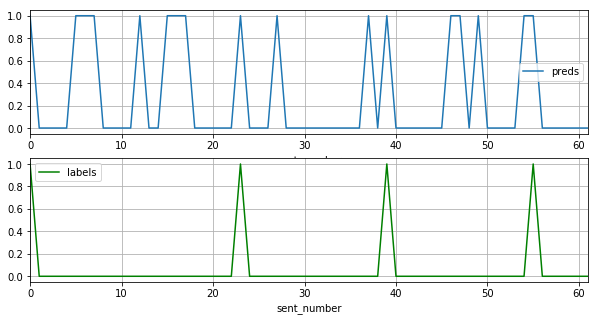

In [48]:
df = pd.DataFrame()
df['preds'] = p[idx,:]
df['labels'] = l[idx]
df['sent_number'] = df.index

fig, axes = plt.subplots(nrows=2, ncols=1)

df.plot(x='sent_number', y='preds', figsize=(10,5), grid=True, ax=axes[0])
df.plot(x='sent_number', y='labels', figsize=(10,5), grid=True, ax=axes[1], color='green')

## Sample predictions on unseen podcast data

In [49]:
test_file = '/home/bmmidei/SliceCast/data/podcasts/hdf5/batch0_0.hdf5'
preds, labels = net.predict(test_file=test_file,
                    num_samples=4,
                    weights_path=weights_path)

Starting Testing
Loaded weights from disk


Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7ff65c1966a0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.


In [83]:
np.set_printoptions(suppress=True)
print(preds.shape)
print(labels.shape)
preds_mod = preds.copy()
#print(preds_mod)

preds_mod[:,:,1] = np.add(preds_mod[:,:,1], -1)
p = np.argmax(preds_mod, axis=2)
l = np.argmax(labels, axis=2)
print(preds_mod[1,180:220])
idx = 1
listview = np.concatenate([preds_mod, np.expand_dims(l, -1)], axis=2)
#print(listview[idx])

(4, 1625, 3)
(4, 1625, 3)
[[ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.         -1.          1.        ]
 [ 0.          0.          0.        ]
 [ 1.         -1.          0.        ]
 [ 1.         -1.          0.        ]
 [ 1.         -1.          0.        ]
 [ 1.         -1.          0.        ]
 [ 1.         -1.          0.        ]
 [ 0.99969757 -0.9996975   0.        ]
 [ 0.5878115  -0.58783674  0.00002518]
 [ 0.          0.          0.        ]

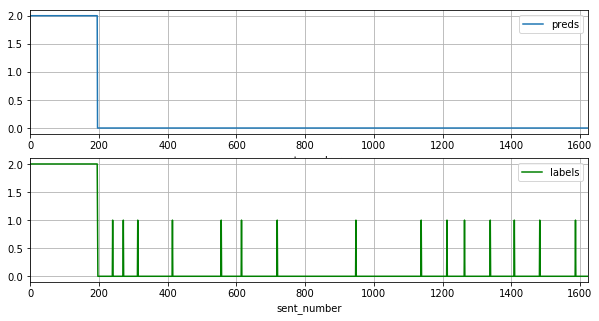

In [84]:
df = pd.DataFrame()
df['preds'] = p[idx,:]
df['labels'] = l[idx]
df['sent_number'] = df.index

fig, axes = plt.subplots(nrows=2, ncols=1)

df.plot(x='sent_number', y='preds', figsize=(10,5), grid=True, ax=axes[0])
df.plot(x='sent_number', y='labels', figsize=(10,5), grid=True, ax=axes[1], color='green')